In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Statistical inference rests upon probability. Because we can very rarely say anything meaningful with absolute certainty from data, we use probabilistic language to make quantitative statements about data. In this chapter, you will learn how to think probabilistically about discrete quantities, those that can only take certain values, like integers. It is an important first step in building the probabilistic language necessary to think statistically.

# Probabilistic logic and statistical inference


## 50 measurements of petal length

![](https://i.imgur.com/m9A3MmT.png)

![](https://i.imgur.com/TVZWCY9.png)

![](https://i.imgur.com/MLhAbEC.png)


# Let’s practice!

# Random number generators and hacker statistics

## Hacker statistics

Uses simulated repeated measurements to compute
probabilities



## The `np.random` module

- Suite of functions based on random number generation
-  np.random.random():
     - draw a number between 0 and 1
     
     
## Bernoulli trial

An experiment that has two options,
"success" (True) and "failure" (False).


## Random number seed

- Integer fed into random number generating
algorithm
- Manually seed random number generator if
you need reproducibility
- Specified using np.random.seed()

## Simulating 4 coin flips

In [5]:
import numpy as np
np.random.seed(42)
random_numbers = np.random.random(size=4)
random_numbers

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

In [2]:
heads = random_numbers < 0.5

In [3]:
heads

array([ True, False, False, False])

In [4]:
np.sum(heads)

1

## Get the probability of getting 4 heads repeating over
- use a for loop

- What is the probability of getting 4 heads?
    - number of times we go all heads, divided by the total muber of trials we did.

In [18]:
n_all_heads = 0  # initialize nyumber of 4-heads trials

for _ in range(10000):  # 10K repeats of the 4-flip trial
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:  # if given trial gives 4 heads
        n_all_heads += 1  # increase the count
        


In [19]:
n_all_heads /10000

0.0621

## Hacker stats probabilities

- Determine how to simulate data
- Simulate many many times
- Probability is approximately fraction of trials
with the outcome of interest

# Let’s practice!

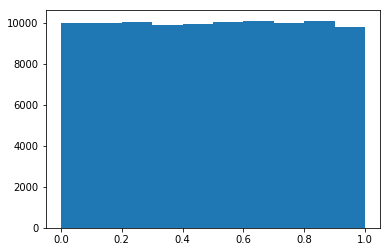

In [22]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

In [23]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0


    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success+=1

    return n_success

#### How many defaults might we expect?
Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

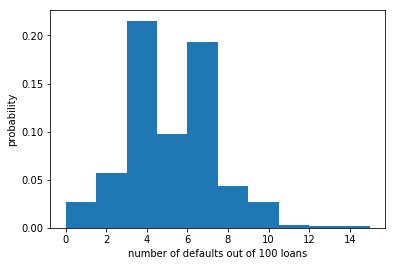

In [24]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()



In [25]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

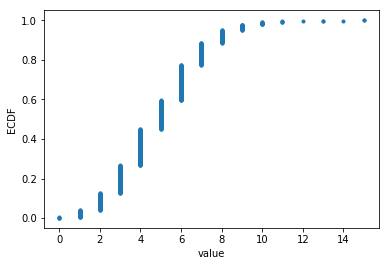

Probability of losing money = 0.022


In [26]:
# Compute ECDF: x, y

x,y = ecdf(n_defaults)
# Plot the ECDF with labeled axes


_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('value')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money

n_lose_money = np.sum(n_defaults >=10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

# Probability distributions and stories: The Binomial distribution

## Probability mass function (PMF)
- ● The set of probabilities of discrete outcomes

## Discrete Uniform PMF

![](https://i.imgur.com/C4epsfh.png)


## Probability distribution
- A mathematical description of outcomes


## Discrete Uniform distribution: the story
- The outcome of rolling a single fair die is
Discrete Uniformly distributed.

## Binomial distribution: the story

- The number r of successes in n Bernoulli trials with
probability p of success, is Binomially distributed
- The number r of heads in 4 coin flips with probability
0.5 of heads, is Binomially distributed

## Sampling from the Binomial distribution

`np.random.binomial(4, 0.5)`  
- number of bernully trials `4`( coin flips)

- and the probability of success (heads) .5

In [ ]:
np.random.binomial(4, 0.5)  # number of b

In [27]:
np.random.binomial(4, 0.5, size=10)  # how many numbers to sample out tof the binomial distribution


array([2, 2, 2, 2, 2, 2, 3, 3, 2, 2])

## The Binomial PMF

To be able to plot the binomial PMF. we'll draw 10,000 samples from a Binomial distribution where we do 60 Bernoulli triasl witth a probability of success of 0.1

In [28]:
samples = np.random.binomial(60, 0.1, size=10000)

# The Binomial CDF

In [31]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

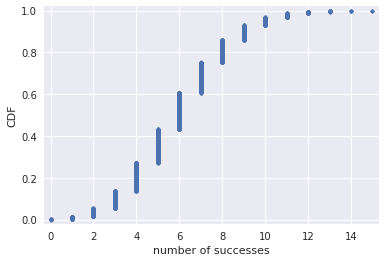

In [32]:
In [1]: import matplotlib.pyplot as plt
In [2]: import seaborn as sns
In [3]: sns.set()
In [4]: x, y = ecdf(samples)
In [5]: _ = plt.plot(x, y, marker='.', linestyle='none')
In [6]: plt.margins(0.02)
In [7]: _ = plt.xlabel('number of successes')
In [8]: _ = plt.ylabel('CDF')
In [9]: plt.show()

# Let’s practice!

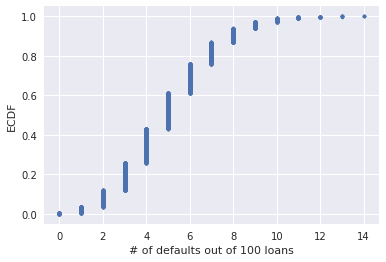

In [33]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05,size=10000)

# Compute CDF: x, y
x,y = ecdf(n_defaults)

# Plot the CDF with axis labels


_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('# of defaults out of 100 loans')
_ = plt.ylabel('ECDF')


# Show the plot

plt.show()

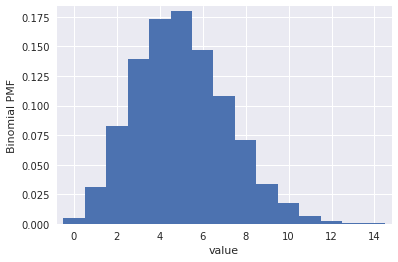

In [34]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, normed=True, bins=bins)


# Set margins
plt.margins(0.02)


# Label axes

_ = plt.xlabel('value')
_ = plt.ylabel('Binomial PMF')

# Show the plot

plt.show()

# Poisson processes and the Poisson distribution

## Poisson process

- The timing of the next event is completely
independent of when the previous event happened

## Examples of Poisson processes

- Natural births in a given hospital
- Hit on a website during a given hour
- Meteor strikes
- Molecular collisions in a gas
- Aviation incidents
- Buses in Poissonville

## Poisson distribution



- The number r of arrivals of a Poisson process in a
given time interval with average rate of λ arrivals
per interval is Poisson distributed.

- The number r of hits on a website in one hour with
an average hit rate of 6 hits per hour is Poisson
distributed

## Poisson PMF

![](https://i.imgur.com/jk1N7Ak.png)


## Poisson Distribution

- Limit of the Binomial distribution for low
probability of success and large number of trials.


- That is, for rare events.



## The Poisson CDF

- 

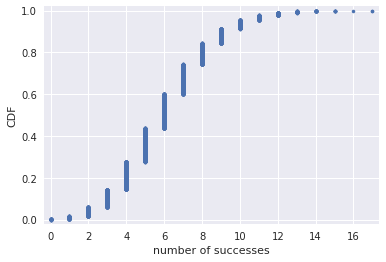

In [35]:
In [1]: samples = np.random.poisson(6, size=10000)
In [2]: x, y = ecdf(samples)
In [3]: _ = plt.plot(x, y, marker='.', linestyle='none')
In [4]: plt.margins(0.02)
In [5]: _ = plt.xlabel('number of successes')
In [6]: _ = plt.ylabel('CDF')
In [7]: plt.show()

# Let’s practice!

In [36]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson

samples_poisson = np.random.poisson(10, size=10000)
# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n= [20,100,1000]
p = [0.5, 0.1, 0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i],size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      9.9899 3.216270820375672
n = 20 Binom: 10.0464 2.248787904627735
n = 100 Binom: 10.0327 3.0320670688492366
n = 1000 Binom: 9.9803 3.1812123333722946


In [38]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >=7)

# Compute probability of getting seven or more: p_large
p_large = n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0062
